## Model to Identify Plant Leaves

## Abstract
This project focuses on developing an automated system for identifying various species of leaves using the Xception model, a deep learning architecture known for its efficiency in image classification tasks. The model is trained on a diverse dataset of plant leaves to enhance accuracy and reliability.

## Introduction
With the increasing interest in plant biodiversity, the need for automated identification systems has become paramount. This project aims to leverage advanced machine learning techniques to accurately classify plant leaves based on image data.

## Project Overview
- **Objective**: To create a robust system capable of identifying and classifying leaf species from images.
- **Dataset**: The dataset comprises images of 83 different leaf species, totaling over 7,000 images.
- **Model Architecture**: The Xception model is utilized due to its superior performance in handling image data through depthwise separable convolutions.

In [1]:
import tensorflow as tf

In [2]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\manan\\Project\\Leaf dataset",
    shuffle=True,
    batch_size=32,
    image_size=(299, 299),
)

labels = dataset.class_names
print(labels)


Found 21793 files belonging to 83 classes.
['Aloevera', 'Amla', 'Amruthaballi', 'Arali', 'Arjun Leaf', 'Astma_weed', 'Badipala', 'Balloon_Vine', 'Bamboo', 'Beans', 'Betel', 'Bhrami', 'Bringaraja', 'Caricature', 'Castor', 'Catharanthus', 'Chakte', 'Chilly', 'Citron lime (herelikai)', 'Coffee', 'Common rue(naagdalli)', 'Coriender', 'Curry', 'Doddpathre', 'Drumstick', 'Ekka', 'Eucalyptus', 'Ganigale', 'Ganike', 'Gasagase', 'Ginger', 'Globe Amarnath', 'Guava', 'Henna', 'Hibiscus', 'Honge', 'Insulin', 'Jackfruit', 'Jasmine', 'Kambajala', 'Kasambruga', 'Kohlrabi', 'Lantana', 'Lemon', 'Lemongrass', 'Malabar_Nut', 'Malabar_Spinach', 'Mango', 'Marigold', 'Marsh Pennywort Leaf', 'Mint', 'Neem', 'Nelavembu', 'Nerale', 'Nooni', 'Onion', 'Padri', 'Palak(Spinach)', 'Papaya', 'Parijatha', 'Pea', 'Pepper', 'Pomoegranate', 'Pumpkin', 'Raddish', 'Rose', 'Rubble Leaf', 'Sampige', 'Sapota', 'Seethaashoka', 'Seethapala', 'Spinach1', 'Tamarind', 'Taro', 'Tecoma', 'Thumbe', 'Tomato', 'Tulsi', 'Turmeric', 'as

## Dataset Description
- The dataset consists of images sourced from various botanical collections.
- Each class corresponds to a specific leaf species, facilitating supervised learning.

In [3]:
import numpy as np

for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    break

(32, 299, 299, 3)
[60 47 47  0 22 15 22 38 49 22 49  4 48  4 76  8  4 50 47 47  0 41  4 50
 11  0 29  9 49 60 72 22]


In [4]:
# train test split
train_size = int(0.8 * len(dataset))
test_size = int(0.2 * len(dataset))
train_size, test_size

(545, 136)

In [ ]:
def get_dataset_partisions_tf(ds, train_split=0.8, test_split=0.2, shuffle=True, shuffle_size=10000):
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * len(ds))
    test_size = int(test_split * len(ds))
    train_ds = ds.take(train_size)
    test_ds = ds.skip(train_size)
    val_ds = test_ds.skip(test_size)
    test_ds = test_ds.take(test_size)
    return train_ds, test_ds, val_ds

In [6]:
train_ds, test_ds, val_ds = get_dataset_partisions_tf(dataset)
len(train_ds), len(test_ds), len(val_ds)

(545, 136, 1)

In [7]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(299, 299),
    tf.keras.layers.Rescaling(1./255)
])

In [8]:
# train using Xception
base_model = tf.keras.applications.Xception(
    weights='imagenet',
    input_shape=(299, 299, 3),
    include_top=False,
    pooling='avg',
    classifier_activation='softmax',
    classes=len(labels)
)

## Model Architecture
### Xception Model Overview
The Xception model is an advanced deep learning architecture based on the Inception model, characterized by its use of depthwise separable convolutions, which improve model performance while reducing computational costs.

In [9]:
base_model.trainable = False

inputs = tf.keras.Input(shape=(299, 299, 3))
x = resize_and_rescale(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(len(labels), activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

history = model.fit(
    train_ds,
    validation_data=val_ds,
    batch_size=32,
    epochs=25
)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 299, 299, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 299, 299, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 2048)                │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 83)                  │          10,707 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,134,459 (80.62 MB)

 Trainable params: 272,979 (1.04 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

Epoch 1/25
545/545 ━━━━━━━━━━━━━━━━━━━━ 1534s 3s/step - accuracy: 0.6439 - loss: 1.7115 - val_accuracy: 0.8125 - val_loss: 0.6336
Epoch 2/25
545/545 ━━━━━━━━━━━━━━━━━━━━ 1577s 3s/step - accuracy: 0.8461 - loss: 0.6081 - val_accuracy: 0.9375 - val_loss: 0.2650
Epoch 3/25
545/545 ━━━━━━━━━━━━━━━━━━━━ 1572s 3s/step - accuracy: 0.8896 - loss: 0.4182 - val_accuracy: 0.9688 - val_loss: 0.1519
Epoch 4/25
545/545 ━━━━━━━━━━━━━━━━━━━━ 1526s 3s/step - accuracy: 0.9166 - loss: 0.3067 - val_accuracy: 1.0000 - val_loss: 0.0571
Epoch 5/25
545/545 ━━━━━━━━━━━━━━━━━━━━ 1535s 3s/step - accuracy: 0.9382 - loss: 0.2328 - val_accuracy: 0.9688 - val_loss: 0.1434
Epoch 6/25
545/545 ━━━━━━━━━━━━━━━━━━━━ 1528s 3s/step - accuracy: 0.9507 - loss: 0.1872 - val_accuracy: 0.9688 - val_loss: 0.0970
Epoch 7/25
545/545 ━━━━━━━━━━━━━━━━━━━━ 1499s 3s/step - accuracy: 0.9591 - loss: 0.1548 - val_accuracy: 0.9688 - val_loss: 0.1095
Epoch 8/25
545/545 ━━━━━━━━━━━━━━━━━━━━ 1538s 3s/step - accuracy: 0.9627 - loss: 0.1349 - 

In [10]:
model.evaluate(test_ds)

136/136 ━━━━━━━━━━━━━━━━━━━━ 445s 2s/step - accuracy: 1.0000 - loss: 0.0044


[0.003921059891581535, 1.0]

## Testing the Model with Known Data

### Objective
The purpose of this section is to evaluate the performance of the trained Xception model on a test dataset containing images of leaves whose species are already known. This evaluation helps assess the model's accuracy and reliability in real-world scenarios.


In [11]:
# predict with new images
import numpy as np

img = tf.keras.preprocessing.image.load_img(
    'C:\\Users\\manan\\please.jpg', target_size=(299, 299)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch


predictions = model.predict(img_array)
score = tf.nn.sigmoid(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
This image most likely belongs to Nelavembu with a 72.95 percent confidence.


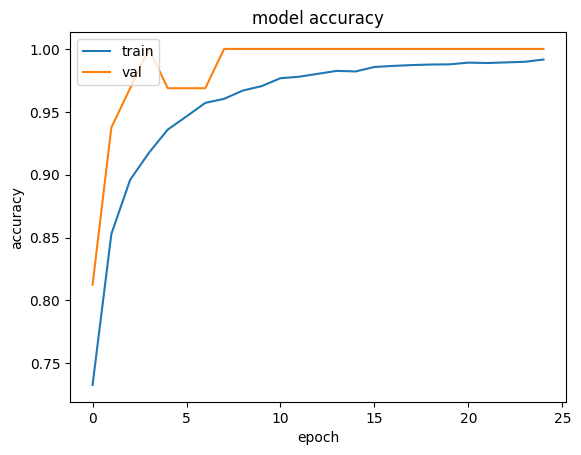

In [12]:
# plot accuracy and loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Saving the Model
After training the Xception model, it is essential to save the model's architecture, weights, and training configuration for future use, such as inference, further training, or deployment. This section outlines the methods for saving the model using TensorFlow/Keras.


In [13]:
model.save('xception_model.keras')

### Conclusion
Saving the model and its weights allows for efficient use of the trained model in future applications. By following the methods outlined in this section, you can ensure that your model is preserved and easily retrievable for later use, whether for inference or continued training. 

We will integrate this model with a camera module to enable real-time identification of leaves, enhancing its practical applications in biodiversity research and education.
